In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PowerTransformer

In [3]:
df = pd.read_csv('./concrete_data.csv')

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [9]:
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [13]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.6275531792314848

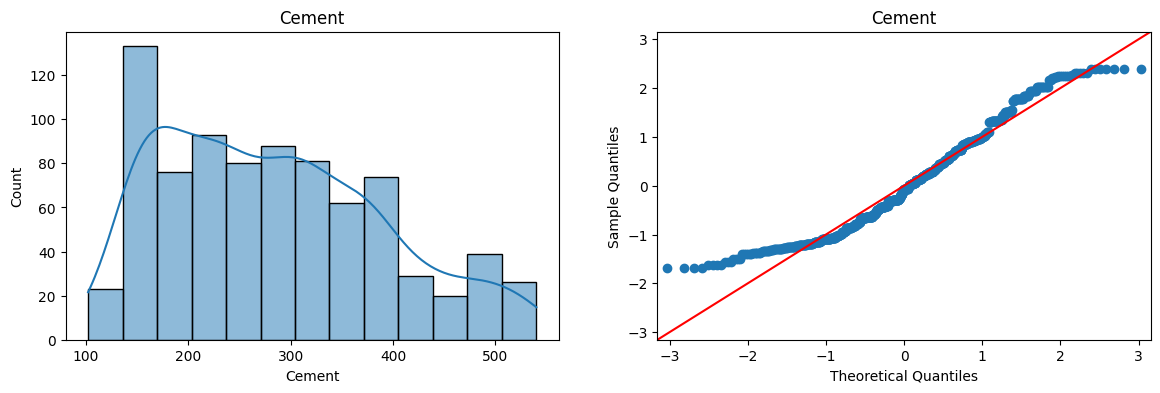

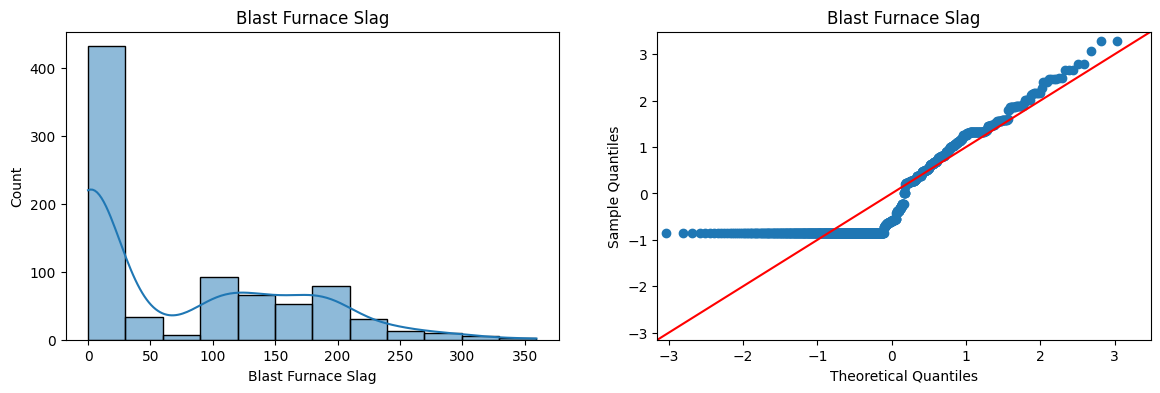

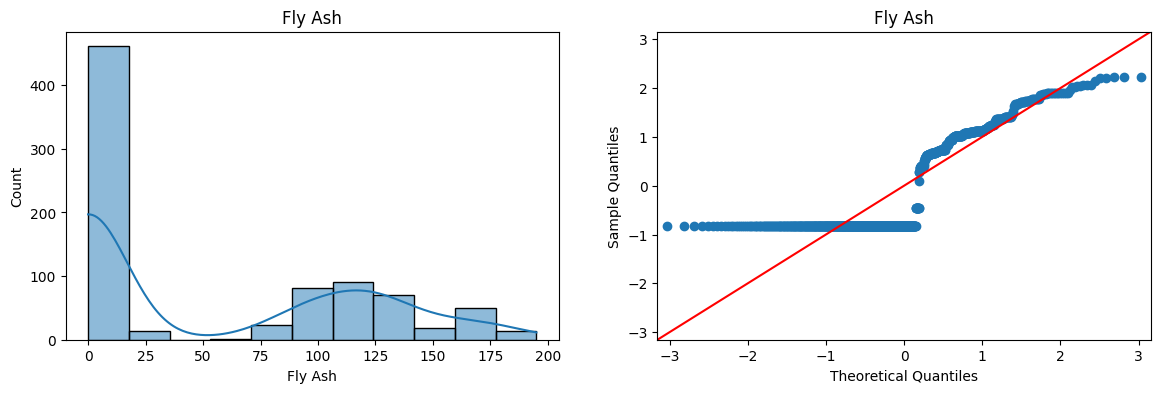

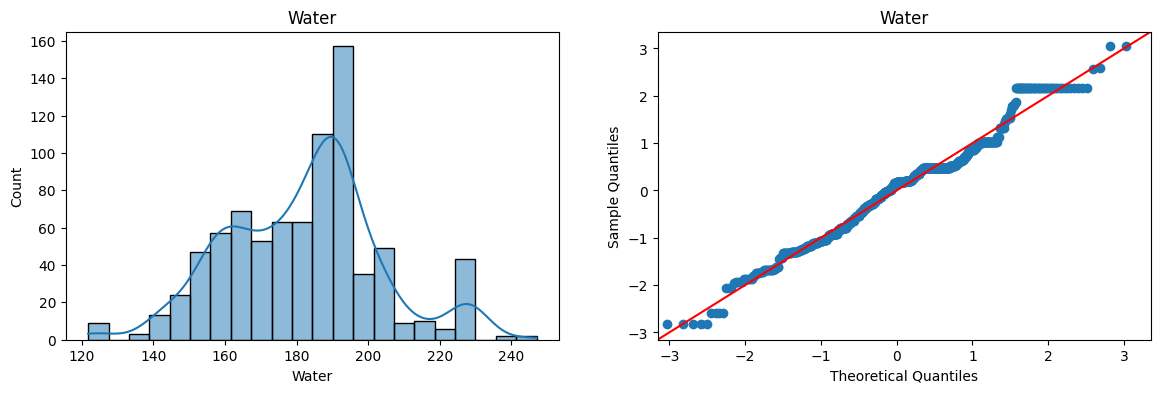

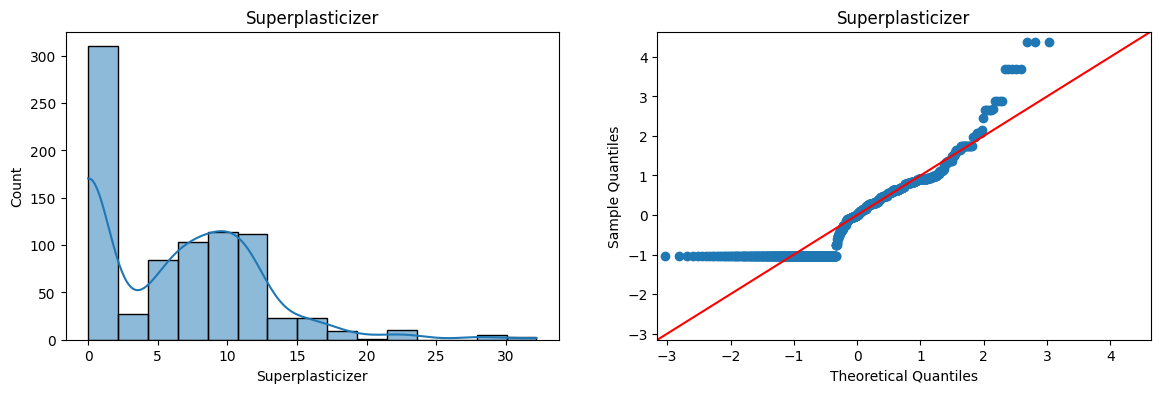

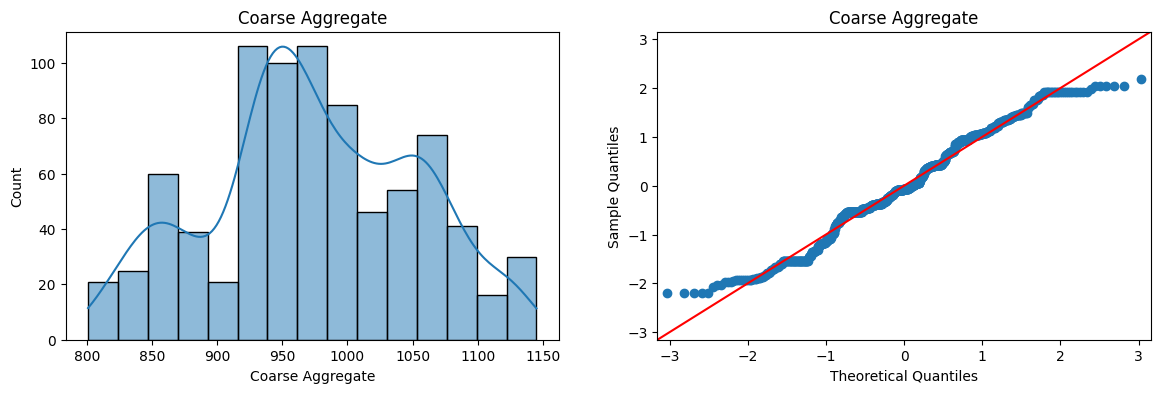

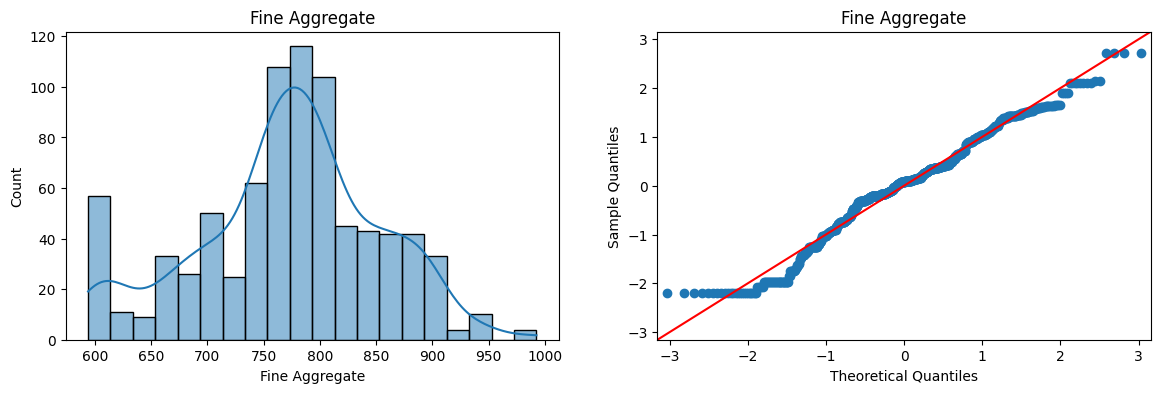

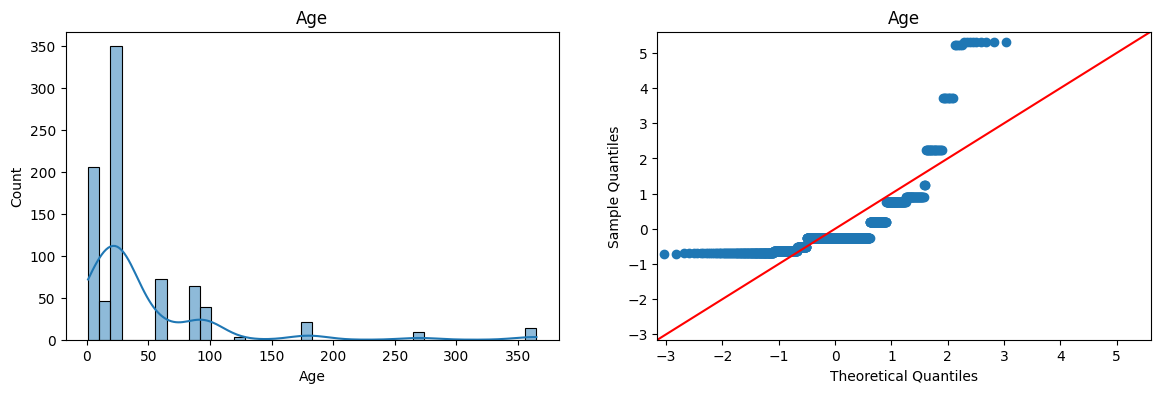

In [26]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    sm.qqplot(X_train[col], line = '45', fit = True, ax = plt.gca())
    plt.title(col)
    plt.show()

In [15]:
pt = PowerTransformer( method = 'box-cox')
X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

In [16]:
lr.fit(X_train_transformed,y_train)
y_pred_new = lr.predict(X_test_transformed)
r2_score(y_test,y_pred_new)

0.8047825008078887

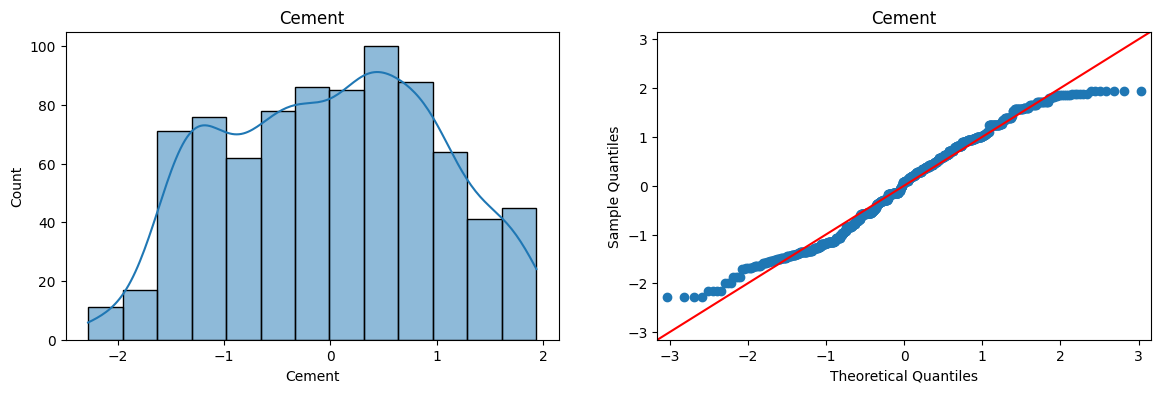

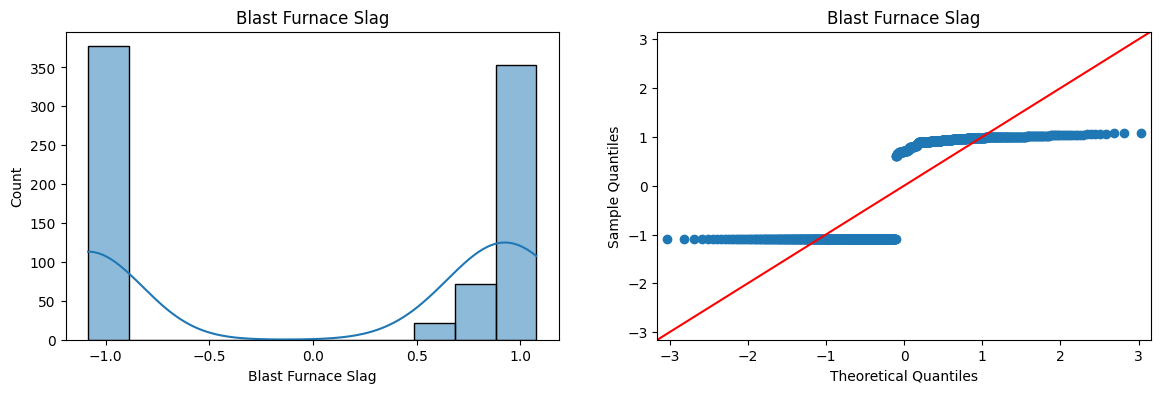

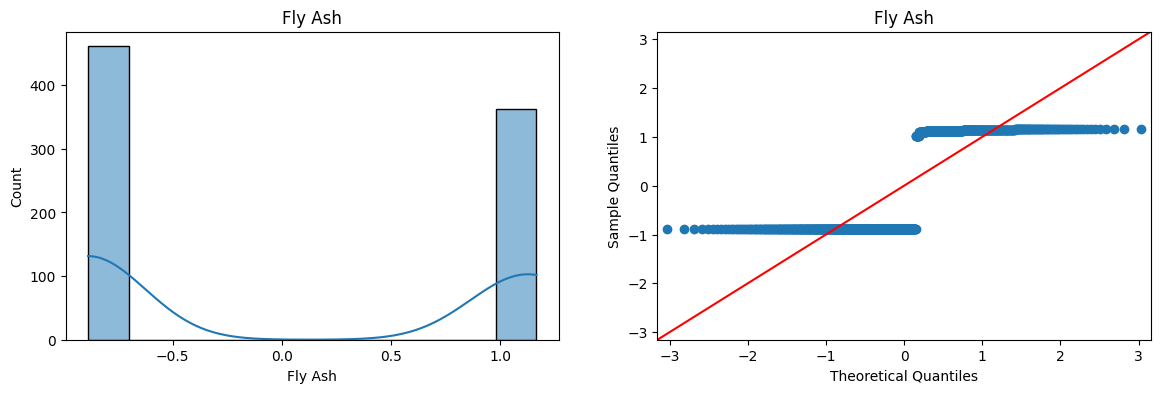

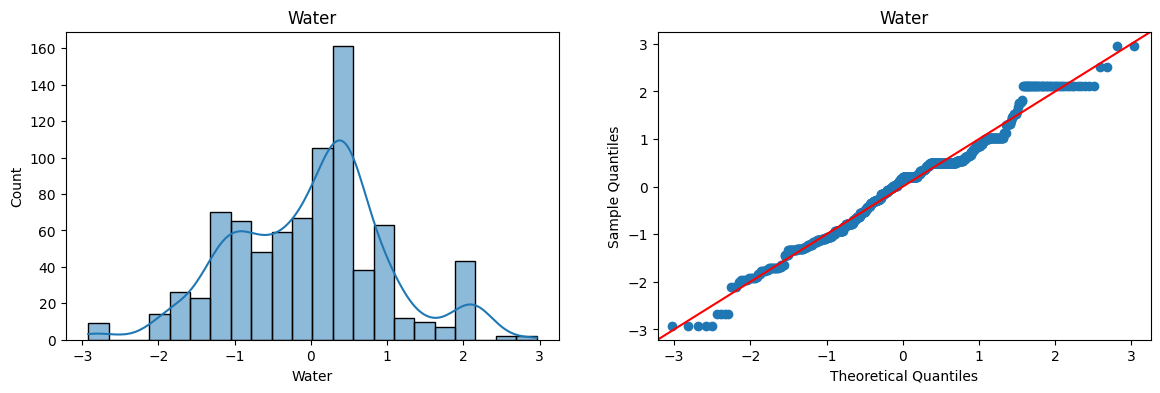

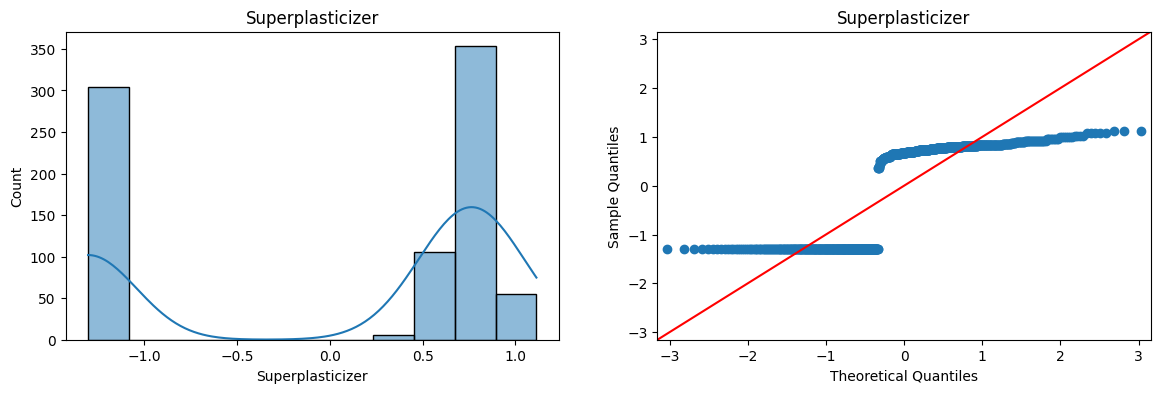

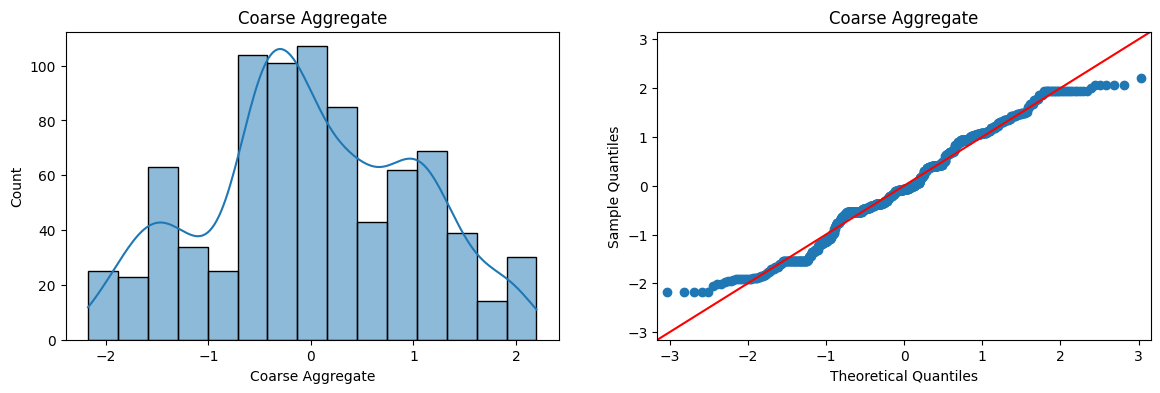

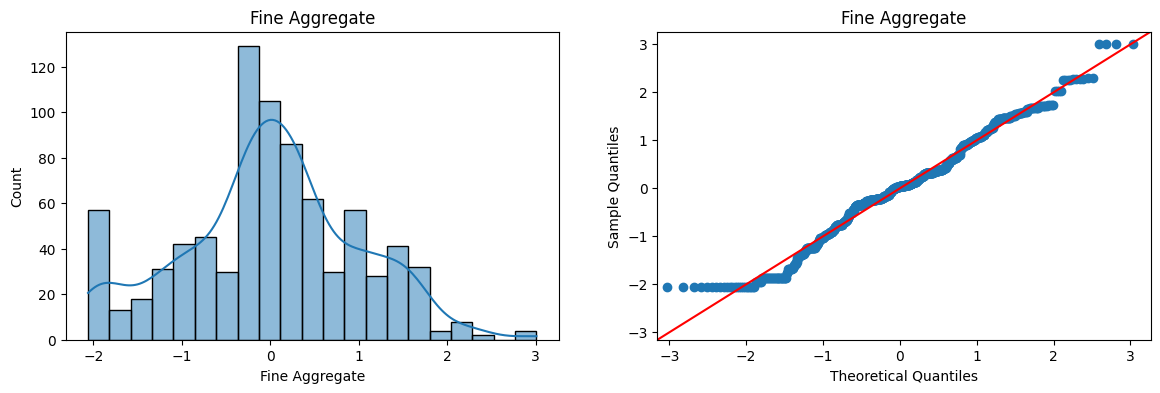

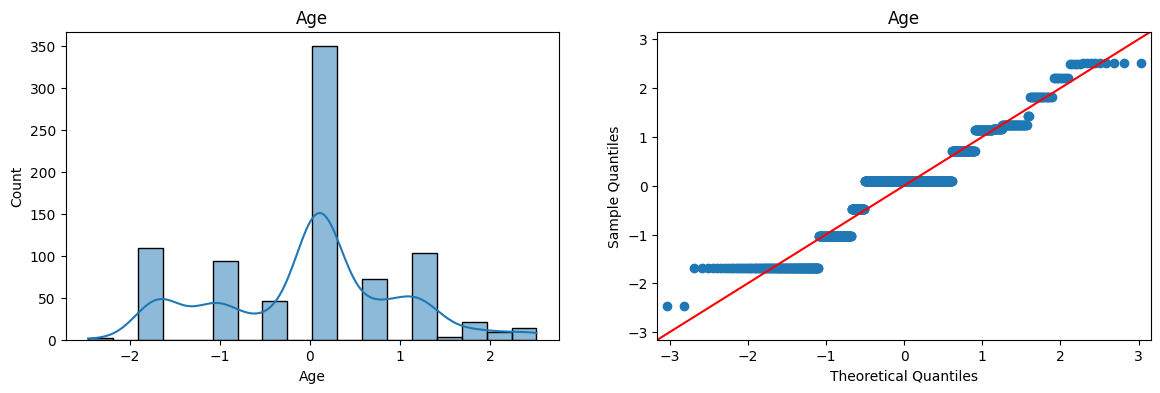

In [33]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns = X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train_transformed[col], kde = True)
    plt.title(col)

    plt.subplot(122)
    sm.qqplot(X_train_transformed[col], line = '45', fit = True, ax=plt.gca())
    plt.title(col)

    plt.show()

In [ ]:
# Yeo - Johnson Method 
pt1 = PowerTransformer()
X_train_transformed1 = pt1.fit_transform(X_train+0.000001)
X_test_transformed1 = pt1.transform(X_test+0.000001)
lr.fit(X_train_transformed1,y_train)
y_pred_new1 = lr.predict(X_test_transformed1)
r2_score(y_test,y_pred_new1)

0.8161906534408048

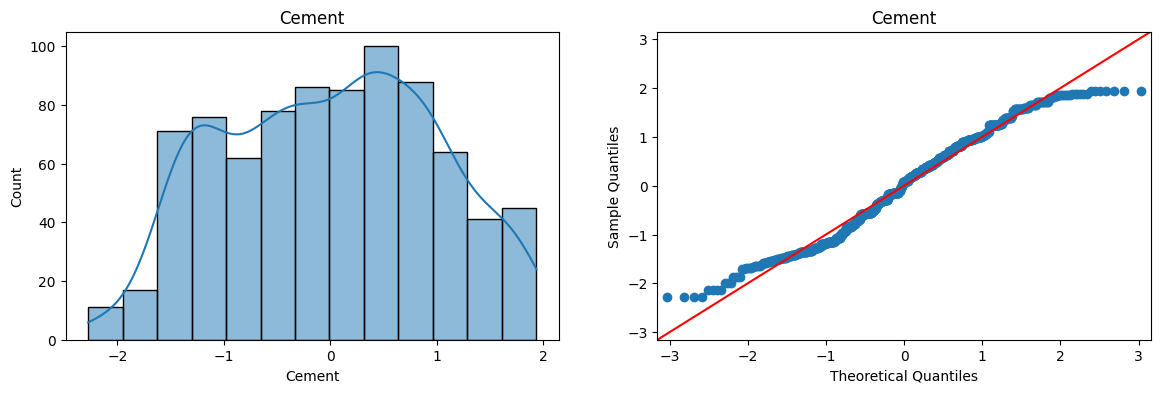

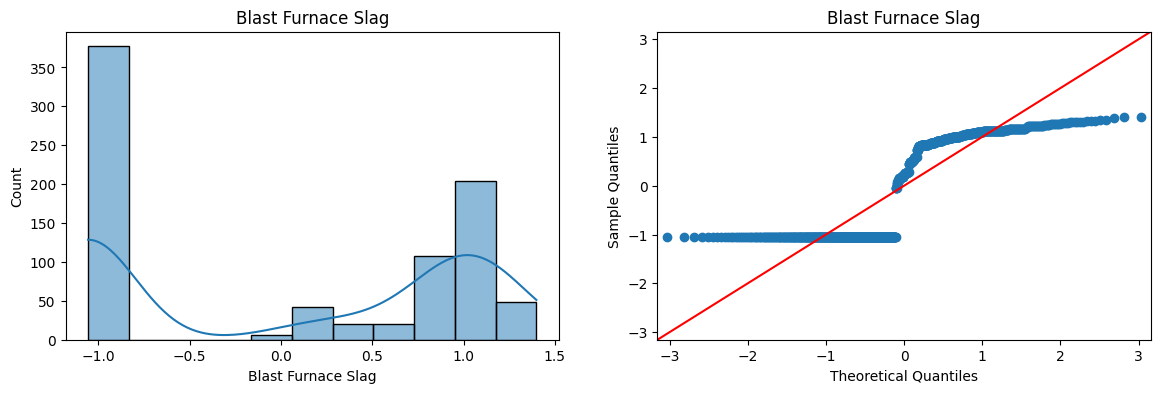

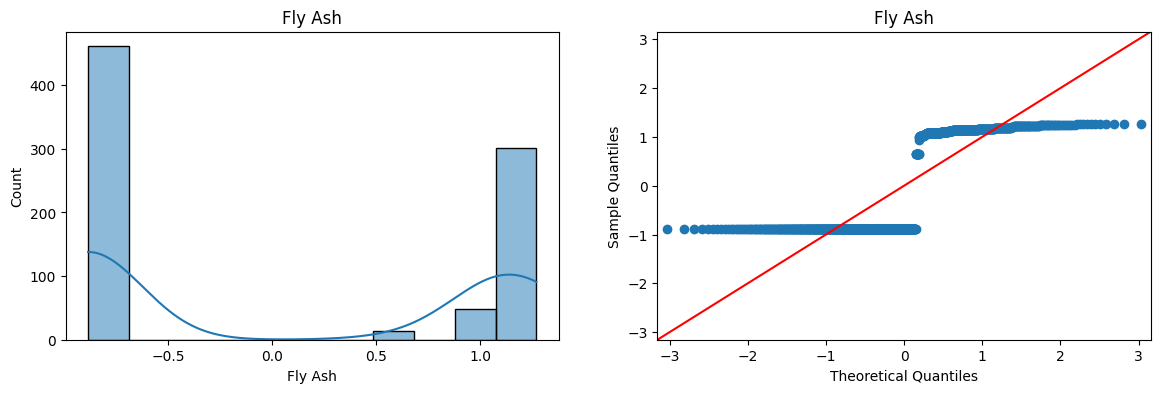

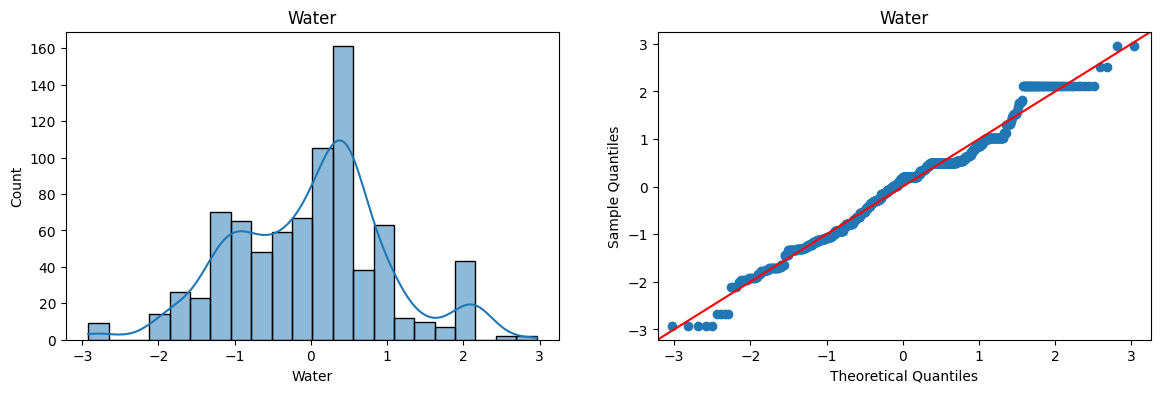

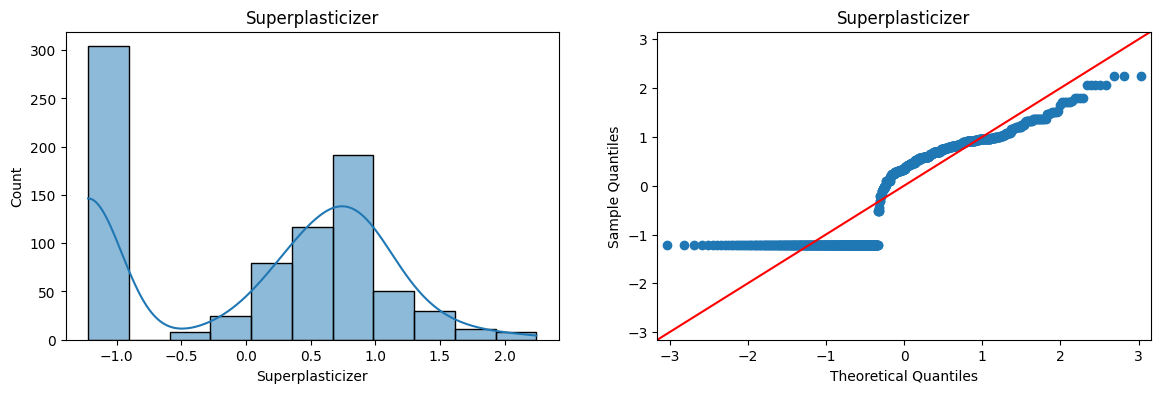

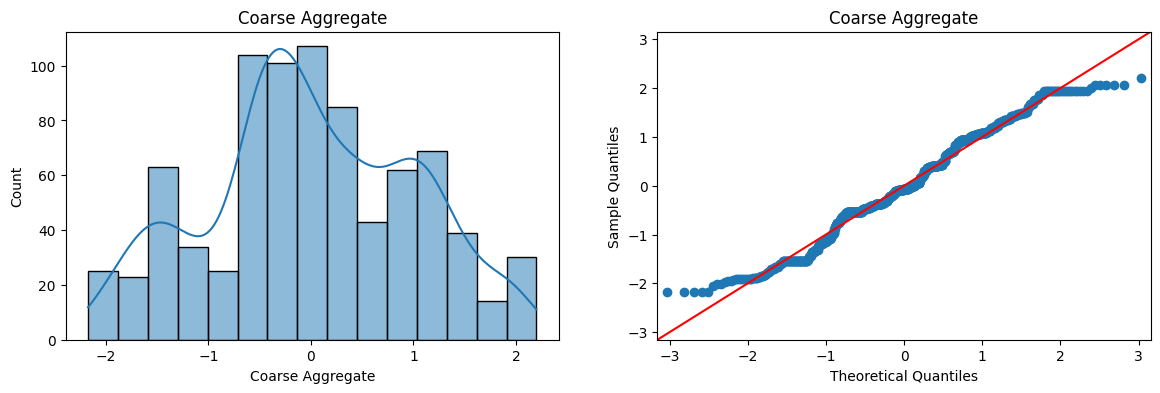

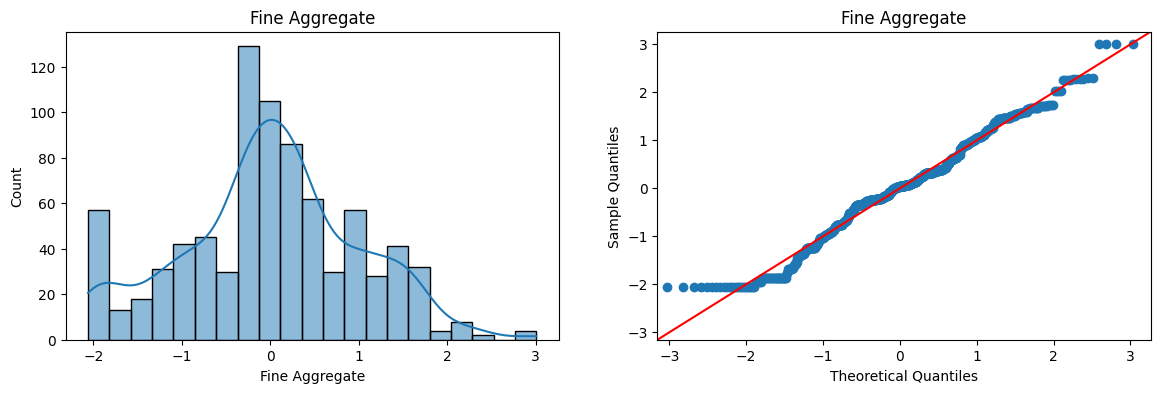

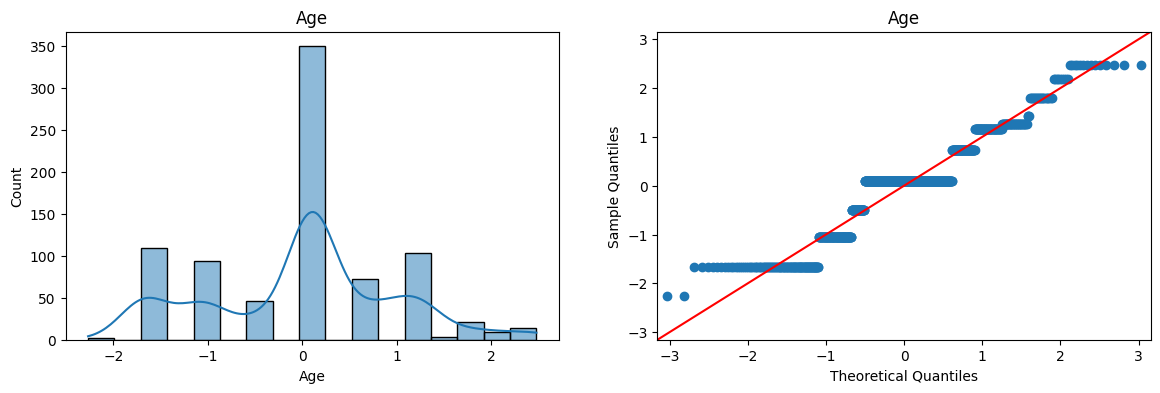

In [34]:
X_train_transformed1 = pd.DataFrame(X_train_transformed1,columns = X_train.columns)

for col in X_train_transformed1.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train_transformed1[col], kde = True)
    plt.title(col)

    plt.subplot(122)
    sm.qqplot(X_train_transformed1[col], line = '45', fit = True, ax=plt.gca())
    plt.title(col)

    plt.show()